In [160]:
import pandas as pd


In [161]:
import nltk
import re
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [162]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ancyb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
from nltk.corpus import stopwords

In [164]:
from nltk.stem.porter import PorterStemmer

In [165]:
ps = PorterStemmer()

In [166]:
data =[]

In [167]:
df = pd.read_csv("spam.csv",encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [168]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1,inplace=True)

In [169]:
df.columns = ["target","text"]

In [170]:
df.shape

(5572, 2)

In [171]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [173]:
df["target"] = encoder.fit_transform(df["target"])

In [174]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [176]:
#check for duplicate values
df.duplicated().sum()

403

In [177]:
#remove duplicates
df =df.drop_duplicates(keep="first")

In [178]:
df.duplicated().sum()

0

In [179]:
df.shape

(5169, 2)

In [180]:
#EDA

In [181]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

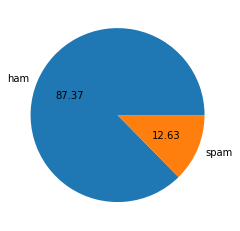

In [183]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [184]:
import nltk

In [185]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ancyb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
df['num_characters'] = df['text'].apply(len)

In [187]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [188]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [189]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [190]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [191]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [192]:
df[['num_characters','num_words','num_sentences']].describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') :
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [193]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [194]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [195]:
df['transformed_text'] = df['text'].apply(transform_text)

In [196]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [197]:
!pip install wordcloud 

In [198]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [199]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

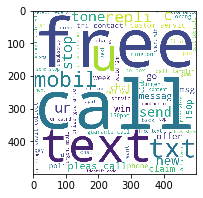

In [200]:
plt.figure(figsize=(10,3))
plt.imshow(spam_wc)

In [201]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

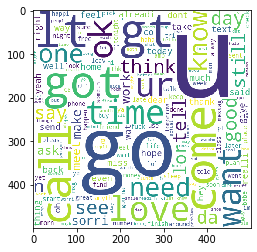

In [202]:
plt.figure(figsize=(10,4))
plt.imshow(ham_wc)

In [203]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [204]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [205]:
len(spam_corpus)

9883

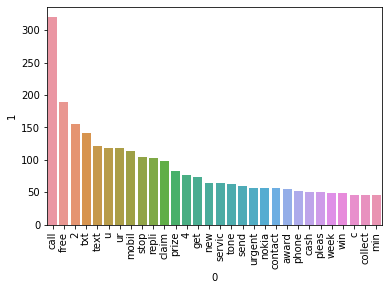

In [206]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [207]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [208]:
len(ham_corpus)

34773

In [209]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [210]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [211]:
x.shape

(5169, 3000)

In [212]:
y = df['target'].values

In [213]:
y.shape

(5169,)

In [214]:
from sklearn.model_selection import train_test_split

In [225]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [226]:
from keras.models import Sequential

In [227]:
from keras.layers import Dense

In [228]:
from keras.layers import LSTM

In [229]:
model = Sequential()

In [230]:
model.add(LSTM(units = 50 , input_shape = (x_train.shape[1],1),return_sequences = True))

In [231]:
model.add(LSTM(units = 50 ,return_sequences = True))

In [232]:
model.add(LSTM(units = 50 ,return_sequences = True))

In [233]:
model.add(LSTM(units=50))

In [234]:
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer= "adam",loss="mse")

In [239]:
model.fit(x_train,y_train,epochs=3,batch_size=32)

Epoch 1/3
130/130 [==============================] - 2276s 18s/step - loss: 0.1095
Epoch 2/3
130/130 [==============================] - 2729s 21s/step - loss: 0.1095
Epoch 3/3
130/130 [==============================] - 1780s 14s/step - loss: 0.1096


In [240]:
model.save("new_output")

INFO:tensorflow:Assets written to: new_output\assets


INFO:tensorflow:Assets written to: new_output\assets


In [241]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [242]:
pred = model.predict(x_train)

130/130 [==============================] - 280s 2s/step


In [243]:
len(y_train)

4135

In [244]:
len(pred)

4135

In [245]:
error = y_train - pred

In [246]:
SE = error*error

In [247]:
MSE = SE.mean()

In [248]:
MSE

0.10918419272356927

In [250]:
import numpy as np

In [251]:
np.sqrt(MSE)

0.3304303144742765

In [253]:
pred = model.predict(x_test)

33/33 [==============================] - 70s 2s/step


In [254]:
np.sqrt(pred)

array([[0.33520773],
       [0.33520773],
       [0.33520773],
       ...,
       [0.33520848],
       [0.3352084 ],
       [0.33520773]], dtype=float32)

In [257]:
pred[0]

array([0.11236423], dtype=float32)

In [258]:
pred[1]

array([0.11236423], dtype=float32)